In [48]:
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
def print_and_plot(x,y):
    print(x.mean(), x.std())
    print(y.mean(), y.std())
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    plt.hist(x.view(-1).tolist(), 50, density=True);
    plt.subplot(122)
    plt.hist(y.view(-1).tolist(), 50, density=True);

## 1
The weights are uniform Gaussian, initially.

Output mean is same, but standard deviation is expanded

tensor(-0.0005) tensor(1.0179)
tensor(-0.0069) tensor(3.2372)


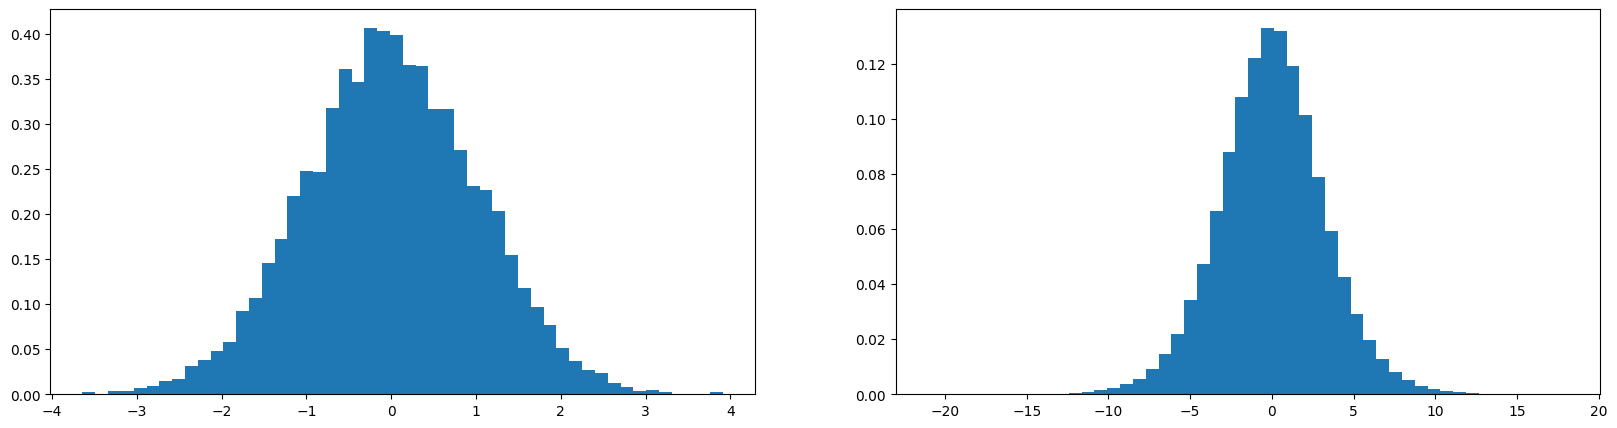

In [50]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)
y = x @ w

print_and_plot(x,y)

## 2
Multiplying weights by a large number increases the standard deviation of the output Gaussian. 

Conversely multiplying by a small number (<1) decrease the standard deviation.

tensor(0.0050) tensor(0.9949)
tensor(-0.0017) tensor(0.6260)


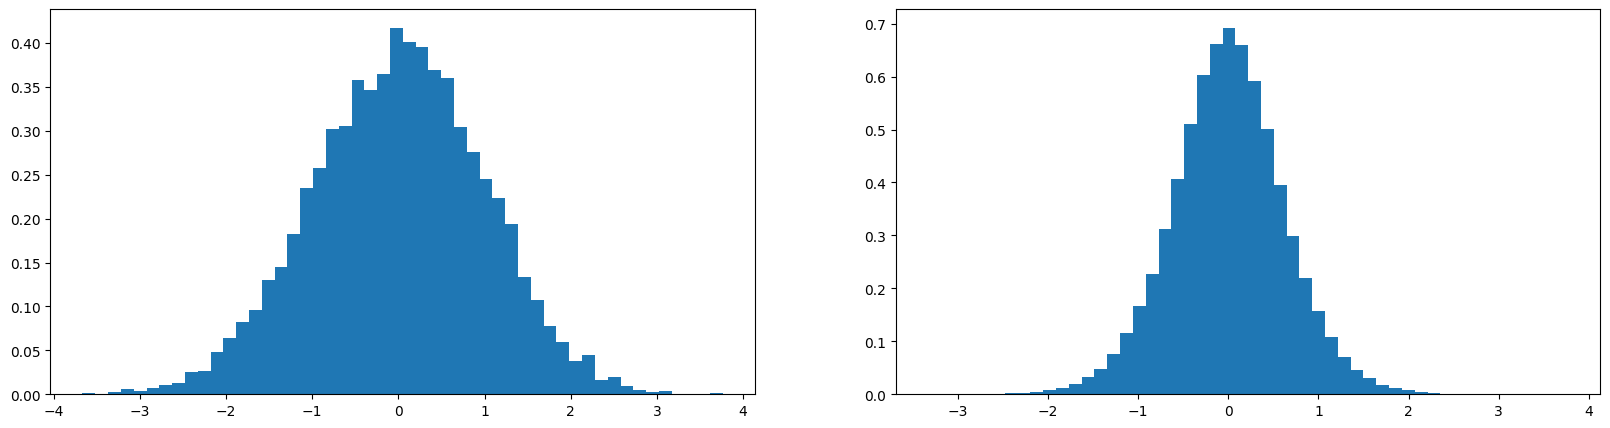

In [51]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) * 0.2
y = x @ w

print_and_plot(x,y)

## 3
What should be the multiplication factor to exactly preserve the standard deviation as 1?

[Delving Deep into Rectifiers](https://arxiv.org/pdf/1502.01852)

[PyTorch nn.init](https://pytorch.org/docs/stable/nn.init.html#torch.nn.init.kaiming_normal_)

tensor(9.2117e-05) tensor(0.9998)
tensor(0.0023) tensor(0.9964)


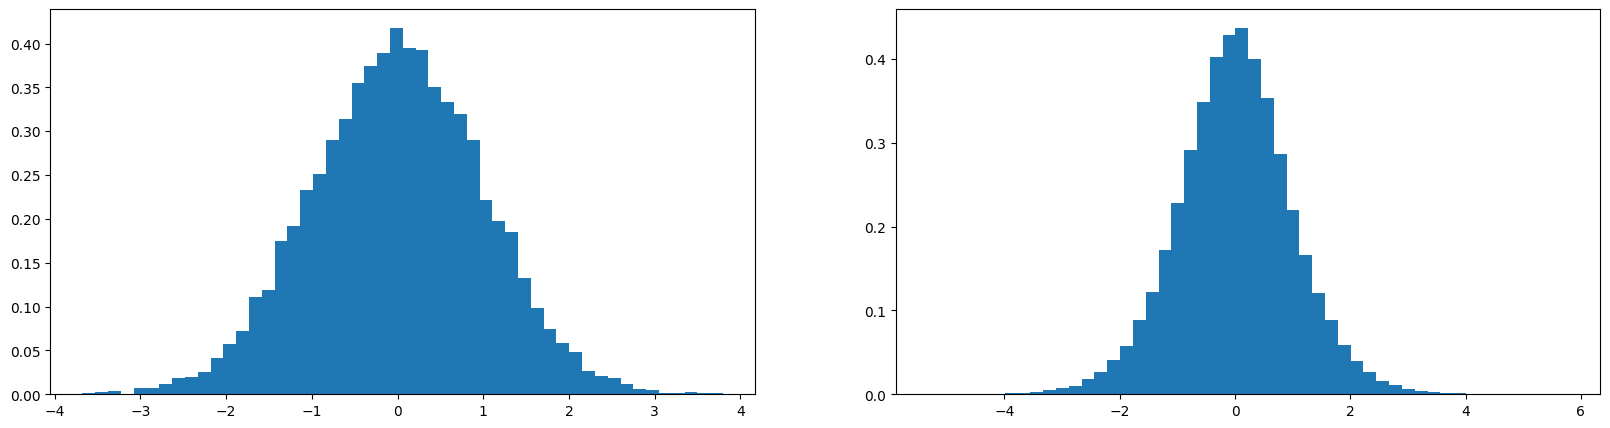

In [52]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200) * (1/10)**0.5
y = x @ w

print_and_plot(x,y)

## 4
Pytorch initialisation of weights is automaticaly done kind of properly?

tensor(-0.0007) tensor(0.9970)
tensor(0.0119, grad_fn=<MeanBackward0>) tensor(0.6013, grad_fn=<StdBackward0>)


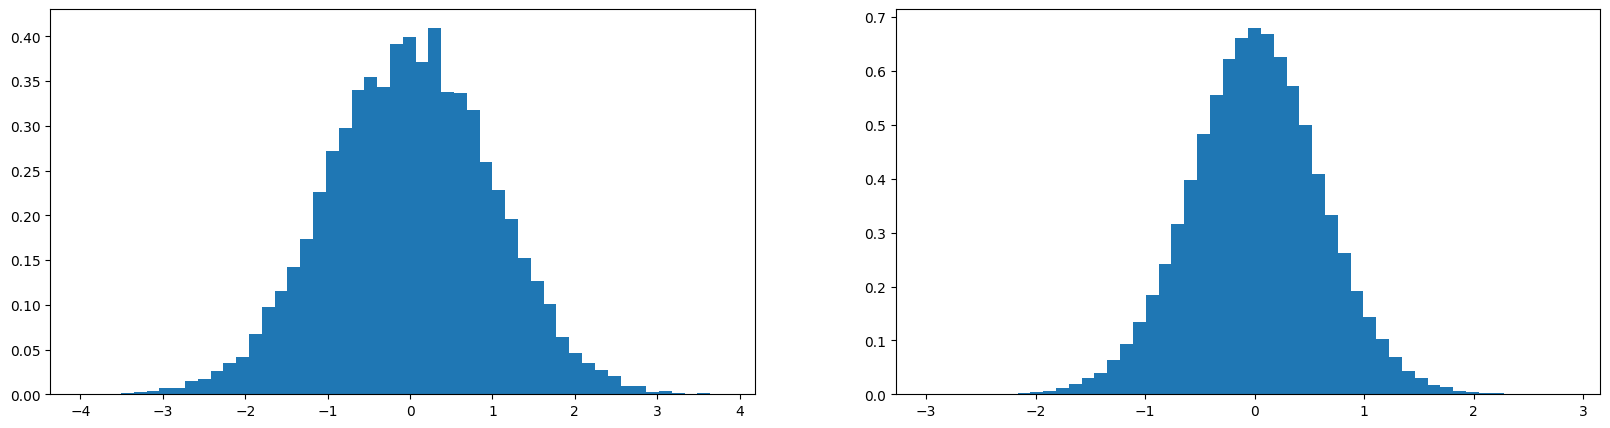

In [53]:
x = torch.randn(1000, 10)
w = nn.Linear(10,200)
y = w(x)

print_and_plot(x,y)

In modern day, it has become less important to initialise the network exactly right. 

Techniques such as:
- residual connections
- batch norm
- layer norm, etc
- better and complex optimizers like Adam etc

make it work.